In [4]:
import requests


response = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm')



In [14]:
import requests
from bs4 import BeautifulSoup

# Send an HTTP request to the URL
response = requests.get('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm')

# Save the HTML content of the response as html_data
html_data = response.text if response.status_code == 200 else None

# Parse the HTML data using BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Print the title to verify parsing was successful
print(soup.title)

<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>


In [18]:
import pandas as pd


# Read the tables from the webpage
tables = pd.read_html( 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm')

# Assuming the Tesla revenue table is the second table
tesla_revenue = tables[1]

# Rename the columns to "Date" and "Revenue"
tesla_revenue.columns = ["Date", "Revenue"]

In [19]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

In [21]:
tesla_revenue.dropna(inplace=True)

# Filter rows where the "Revenue" column is not an empty string
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

In [ ]:
QUESTION 3

In [27]:
pip install yfinance

     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB 660.6 kB/s eta 0:00:05
     - -------------------------------------- 0.1/3.0 MB 1.0 MB/s eta 0:00:03
     -- ------------------------------------- 0.2/3.0 MB 1.1 MB/s eta 0:00:03
     ---- ----------------------------------- 0.3/3.0 MB 1.4 MB/s eta 0:00:02
     ---- ----------------------------------- 0.3/3.0 MB 1.5 MB/s eta 0:00:02
     ----- ---------------------------------- 0.4/3.0 MB 1.4 MB/s eta 0:00:02
     ------ --------------------------------- 0.5/3.0 MB 1.5 MB/s eta 0:00:02
     -------- ------------------------------- 0.6/3.0 MB 1.7 MB/s eta 0:00:02
     ---------- ----------------------------- 0.8/3.0 MB 1.8 MB/s eta 0:00:02
     ----------- ---------------------------- 0.9/3.0 MB 1.8 MB/s eta 0:00:02
     ------------ --------------------------- 0.9/3.0 MB 1.8 MB/s eta 0:00:0

In [31]:
import yfinance as yf

# Create a ticker object for GameStop with ticker symbol GME
gme_ticker = yf.Ticker("GME")

# Fetch historical stock data for GameStop
gme_data = gme_ticker.history(period="1y")  

# Print the first few rows of the stock data
print(gme_data.head())

                                Open       High        Low      Close  \
Date                                                                    
2023-05-22 00:00:00-04:00  22.100000  24.360001  21.990000  24.209999   
2023-05-23 00:00:00-04:00  23.889999  23.900000  22.799999  23.160000   
2023-05-24 00:00:00-04:00  23.129999  23.520000  22.730000  23.270000   
2023-05-25 00:00:00-04:00  23.500000  23.690001  22.709999  23.350000   
2023-05-26 00:00:00-04:00  23.469999  23.709999  23.059999  23.250000   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-05-22 00:00:00-04:00  6251600        0.0           0.0  
2023-05-23 00:00:00-04:00  3786500        0.0           0.0  
2023-05-24 00:00:00-04:00  1901000        0.0           0.0  
2023-05-25 00:00:00-04:00  2494400        0.0           0.0  
2023-05-26 00:00:00-04:00  2261900        0.0           0.0  


In [37]:
gme_data = gme_ticker.history(period="max")

print(gme_data.head())

                               Open      High       Low     Close    Volume  \
Date                                                                          
2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625  1.683250  11021600   
2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295  1.662209   6892800   

                           Dividends  Stock Splits  
Date                                                
2002-02-13 00:00:00-05:00        0.0           0.0  
2002-02-14 00:00:00-05:00        0.0           0.0  
2002-02-15 00:00:00-05:00        0.0           0.0  
2002-02-19 00:00:00-05:00        0.0           0.0  
2002-02-20 00:00:00-05:00        0.0           0.0  


In [40]:
# Reset index inplace
gme_data.reset_index(inplace=True)


   level_0  index                      Date      Open      High       Low  \
0        0      0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296   
1        1      1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625   
2        2      2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001   
3        3      3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047   
4        4      4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295   

      Close    Volume  Dividends  Stock Splits  
0  1.691666  76216000        0.0           0.0  
1  1.683250  11021600        0.0           0.0  
2  1.674834   8389600        0.0           0.0  
3  1.607504   7410400        0.0           0.0  
4  1.662209   6892800        0.0           0.0  


In [41]:
# Display the first five rows of the gme_data DataFrame
print(gme_data.head())

   level_0  index                      Date      Open      High       Low  \
0        0      0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296   
1        1      1 2002-02-14 00:00:00-05:00  1.712707  1.716073  1.670625   
2        2      2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001   
3        3      3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047   
4        4      4 2002-02-20 00:00:00-05:00  1.615920  1.662209  1.603295   

      Close    Volume  Dividends  Stock Splits  
0  1.691666  76216000        0.0           0.0  
1  1.683250  11021600        0.0           0.0  
2  1.674834   8389600        0.0           0.0  
3  1.607504   7410400        0.0           0.0  
4  1.662209   6892800        0.0           0.0  


In [ ]:
QUESTION 4

In [44]:
import requests

# Send a GET request to the URL and save the response
response = requests.get("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html")

# Save the text of the response as a variable named html_data
html_data = response.text

In [45]:
pip install beautifulsoup4

In [47]:
from bs4 import BeautifulSoup

# Parse the HTML data using Beautiful Soup
soup = BeautifulSoup(html_data, "html.parser")

In [59]:


# Extract Date and Revenue columns
gme_revenue = gme_data[['Open']].rename(columns={'Open': 'Revenue'}).reset_index()
gme_revenue.columns = ['Date', 'Revenue']




                       Date             Revenue
0 2002-02-13 00:00:00-05:00   1.620128204072825
1 2002-02-14 00:00:00-05:00     1.7127072205329
2 2002-02-15 00:00:00-05:00  1.6832504163818824
3 2002-02-19 00:00:00-05:00   1.666417795821863
4 2002-02-20 00:00:00-05:00  1.6159203121217995


In [60]:
# Remove commas and dollar signs from Revenue
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(str).str.replace(',', '').str.replace('$', '')


In [61]:
# Display the DataFrame
print(gme_revenue.head())

                       Date             Revenue
0 2002-02-13 00:00:00-05:00   1.620128204072825
1 2002-02-14 00:00:00-05:00     1.7127072205329
2 2002-02-15 00:00:00-05:00  1.6832504163818824
3 2002-02-19 00:00:00-05:00   1.666417795821863
4 2002-02-20 00:00:00-05:00  1.6159203121217995


In [62]:
# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())

                          Date             Revenue
5600 2024-05-14 00:00:00-04:00   64.83000183105469
5601 2024-05-15 00:00:00-04:00  40.310001373291016
5602 2024-05-16 00:00:00-04:00   33.97999954223633
5603 2024-05-17 00:00:00-04:00  21.860000610351562
5604 2024-05-20 00:00:00-04:00  21.540000915527344


In [ ]:
QUESTION 1

In [63]:
import yfinance as yf


                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [64]:
# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

In [65]:
# Extract historical stock data for Tesla
tesla_data = tesla.history(period="max")

In [66]:
# Display the first few rows of the extracted data
print(tesla_data.head())

                               Open      High       Low     Close     Volume  \
Date                                                                           
2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667  281494500   
2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667  257806500   
2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000  123282000   
2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   77097000   
2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000  103003500   

                           Dividends  Stock Splits  
Date                                                
2010-06-29 00:00:00-04:00        0.0           0.0  
2010-06-30 00:00:00-04:00        0.0           0.0  
2010-07-01 00:00:00-04:00        0.0           0.0  
2010-07-02 00:00:00-04:00        0.0           0.0  
2010-07-06 00:00:00-04:00        0.0           0.0  


In [67]:
# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)


                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [68]:
# Display the first five rows of the DataFrame
print(tesla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [ ]:
Question 5: Plot Tesla Stock Graph

In [69]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


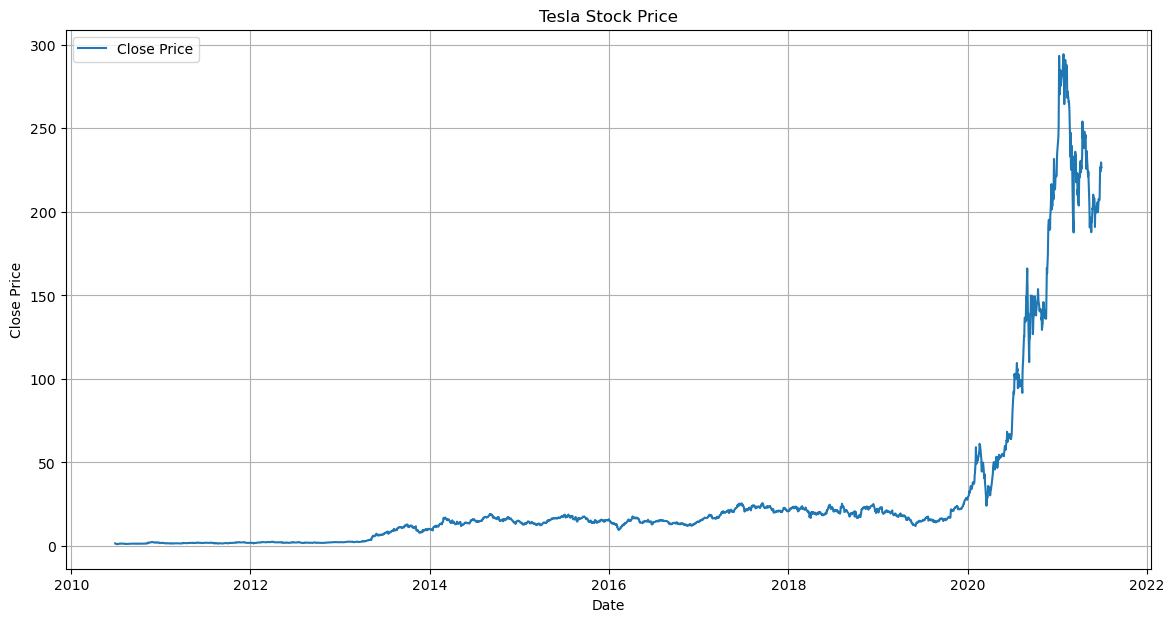

In [84]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Create a ticker object for Tesla
tesla = yf.Ticker("TSLA")

# Extract historical stock data for Tesla
tesla_data = tesla.history(period="max")

# Reset the index of the DataFrame
tesla_data.reset_index(inplace=True)

# Define the make_graph function
def make_graph(stock_data, title):
    # Filter data up to June 2021
    stock_data_filtered = stock_data[stock_data['Date'] <= '2021-06-30']
    
    # Plot the stock data
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data_filtered['Date'], stock_data_filtered['Close'], label='Close Price')
    
    # Add title and labels
    plt.title(f"{title} Stock Price")
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the make_graph function with Tesla data
make_graph(tesla_data, 'Tesla')

In [ ]:
Question 6: Plot GameStop Stock Graph

In [87]:
gme_data_filtered = gme_data[gme_data.index <= '2021-06-30']

# Call make_graph function
make_graph(gme_data_filtered, gme_revenue, 'GameStop Stock Data (up to June 2021)')

TypeError: make_graph() takes 2 positional arguments but 3 were given